<a href="https://colab.research.google.com/github/vasiliyeskin/Deep-Reinforcement-Learning-Hands-On/blob/master/Deep-Reinforcement-Learning-Hands-On/Chapter02/test_gym_cartpole_randome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym

In [5]:
if __name__ == "__main__":
    env = gym.make("CartPole-v0")

    total_reward = 0.0
    total_steps = 0
    obs = env.reset()

    while True:
        action = env.action_space.sample()
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        total_steps += 1
        if done:
            break

    print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))

Episode done in 26 steps, total reward 26.00


In [9]:
import gym
import random

class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.1):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action):
        if random.random() < self.epsilon:
            print("Random!")
            return self.env.action_space.sample()
        return action


if __name__ == "__main__":
    env = RandomActionWrapper(gym.make("CartPole-v0"))

    obs = env.reset()
    total_reward = 0.0

    while True:
        obs, reward, done, _ = env.step(0)
        total_reward += reward
        if done:
            break

    print("Reward got: %.2f" % total_reward)

Random!
Reward got: 10.00


In [13]:
!xvfb-run -s "-screen 0 1400x900x24" jupyter notebook

/bin/bash: xvfb-run: command not found


In [11]:
import gym

if __name__ == "__main__":
    env = gym.make("CartPole-v0")
    env = gym.wrappers.Monitor(env, "recording", force=True)

    total_reward = 0.0
    total_steps = 0
    obs = env.reset()

    while True:
        action = env.action_space.sample()
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        total_steps += 1
        if done:
            break

    print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))
    env.close()
    env.env.close()

NameError: ignored

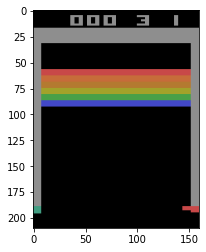

In [18]:
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0')
env.reset()
for _ in range(100):
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

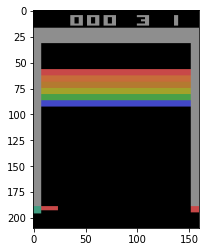

In [16]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)